# CH160: Introduction to Python IV - Functions

<img src="./STUFF/StarWars.jpg" width="400">

# 0 - Required packages
This workshop will use some additional Python modules, so we need to import these first:

In [1]:
#IMPORT ADDITIONAL PYTHON MODULES USED IN THIS WORKSHOP

import numpy as np
import matplotlib.pyplot as plt
import random          # random number generator

# 1 - Introduction

In previous workshops of this course you have already met, and made use of, several built-in Python functions, including  ```print()```, ```len()```, ```range()```, *etc.*, and several further functions which are not part of the core Python language, but can be added by *importing* additional packages, *e.g.*  ```array()```, ```arange()```, ```linspace()```, *etc.* which are part of the NumPy module. In this workshop you will learn how to define and use your own Python functions.

## 1.1 - What is a function anyway?
You may have come across the concept of a function in mathematics (if you have not, or you need a refresher, functions are covered in lecture 4 of CH162:Mathematics for Chemists, part 1), where they are used to describe the relationship - or mapping - between one or more input variables, and an output variable. Often a mathematical function is written as:
$$z=f(x,\,y)$$
Where this notation indicates that $f$ is a function which operates on the input variables $x$ and $y$ to generate the output $z$. 

Programming functions are much more general than this (*i.e.*, we are not limited to the mathematical manipulation of numbers), and the availability of both pre-defined functions and the ability to define and write your own functions is a central part of nearly all programming languages!

In programming a function is a self-contained block of code which is designed to perform a very specific task - for instance the in-built ```len()``` function can be used to tell you how many elements there are in a list or array, whilst ```print()``` is the function we use if we wish to print things to screen. In each case we call the function by name, and include some appropriate arguments within the parentheses (*i.e.* a text string in the case of ```print()```), Python then runs the block of code associated with the called function and performs the requested action, before returning to your code at the point it left off.


## 1.2 - Why do we care about functions?
### The beauty of reusable code
Often when you are writing code you will perform the same series of operations over and over again. You could simply copy-paste the useful code wherever it is used. However, if you subsequently modified the code in question you would need to make the same modification in every location it was reused.

A better solution is to write your useful bit of code in the form of a Python function. Whenever you need to use the code you then just need to call the function rather then copy it verbatim. If you later want to change how it works, you only need to make changes in one location - the place you defined your function - and the changes will automatically be picked up whenever the function is called.

# 2 - The anatomy of a function
## 2.1 - Defining functions
We create functions using the following syntax:
```python
def <function_name>(<[parameters]>):
    <body>
    return <value>
```

Here the command ```def``` is used to tell Python that a new function is being defined, ```<function_name>``` is the name of the function, ```<[parameters]>``` is an optional comma-separated list of input parameters which are passed to the function, and  ```<body>``` is the series of python commands you want to perform (this can include loop structures, conditional statements, and even call other functions). Note that just like the loop and conditional structures we met in workshop 3, the ```<body>``` code needs to be indented. 

The ```return``` statement is probably the part of a Python function that causes the most confusion. It is an optional statement which comes at the end of the ```<body>```, and its role is to pass the value of the specified object (remember that in Python an *object* includes things such as numbers, strings, lists, arrays, tuples, *etc.*) out of the function for use later on - most functions you write will need to include a ```return``` statement to be useful.

As a simple example, consider the following user-defined function: 

In [2]:
#OUR FIRST FUNCTION

# Create a function called 'HW', which returns the string 'Hello, World!' when called, note that even
# though this function does not contain any parameters in its definition, the parentheses following 
# <function_name> must still be included. 
 
def HW():
    return("Hello, World!")

When the above cell was run, you will notice that it doesn't appear to do anything - it certainly does not print anything to screen like promised! This is because the above code cell just defines the function, in order to use a function we need to call it using the following syntax:
```python
<function_name>(<[arguments]>)
```
where ```<[arguments]>``` are the values passed into the function, and correspond to the ```<[parameters]>``` in the function definition.

From this, we see that we run our ```HW()``` function as follows:

In [3]:
#CALLING A FUNCTION

# To use our user-defined function, we just need to call it. Since the function has no parameters, 
# no arguments are needed (we still need to type out the parentheses though)
HW()

'Hello, World!'

## 2.2 - Parameters and arguments
The function ```HW()``` did not have any parameters in its definition, and consequently did not require any arguments to be specified when it was called.  While this can sometimes be useful, more often we want to pass data to a function so as to change its behaviour/output from one call to the next. In order to do this, we make use of arguments. 

The simplest way to do this is to use *positional arguments*. As an example of this, lets write a function which takes a single number as an argument, multiplies this number by 2, and prints the result. We first need to define our function as before, but now we need to specify the required parameter inside the parentheses: 

In [4]:
#SPECIFYING FUNCTION PARAMETERS

# Define a function 'times2' which has a single parameter 'x' and returns the value of x*2 when called
def times2(x):
    x_times_2 = x * 2
    return x_times_2

When we call the function we need to specify the value of the argument by typing a number inside the parentheses: 

In [5]:
#CALLING FUNCTIONS WITH ARGUMENTS

# The function is called by specifying a numerical value for the argument, we can print the output directly...
print(times2(4))        #Should print the result 4 * 2

# Or we can store it as a variable for use later on
value=times2(13.4)     #Should store the result 13.4 * 2 in the variable 'value'
print(value)

8
26.8


Hopefully you can see that the parameter ```x``` is behaving like a variable which takes on the value of its corresponding argument when the function is called.

<div class="alert alert-block alert-info">
    
### Task 1:
Write a function that returns the square of any number passed to it as an argument (*i.e.* if the function is called with ```6.3``` as an argument, it will return ```39.69``` as output). 

In [6]:
#TASK 1 ANSWER:

def sqr(x):
    x_squared=x**2
    return x_squared

# Check the function works by calling it several times using different arguments and printing the output
print(sqr(6.3))
print(sqr(4))
print(sqr(1000))

39.69
16
1000000


As another example, suppose that we wanted to write a function that sums all of the numbers between 0 and 100 (inclusive). We saw in the last workshop how we could use the following ```for``` loop to achieve this:
```python
s=0
for i in range(101):
   s+=i
```

To change how many numbers are included in the sum, we need to change the number used in the ```range()``` command. If we specify this number as a function parameter, we can control its value by setting it in a function argument:

In [7]:
#OUR FIRST 'USEFUL' FUNCTION

# Define a function 'number_sum' which has a single parameter - 'max_n'.
# This parameter is then used to define the upper limit in the range() command of a 
# for loop in the body of the function.
 
def number_sum(max_n):
    # Initialise the accumulator
    s=0
    
    # Prepare for loop which performs running sum of all numbers up to (but not including) max_n
    for i in range(max_n):      
        s+=i       # Note double indentation of this line 
    
    return s       # Note that indentation of return statement has returned to normal 

# Sum the numbers 1-100 by calling 'number_sum' with the number 101 as its argument
print("Sum of all numbers up to 100 =", number_sum(101))

# Sum the numbers 1-3333 by calling 'number_sum' with the number 3334 as its argument
print("Sum of all numbers up to 3333 =", number_sum(3334))

Sum of all numbers up to 100 = 5050
Sum of all numbers up to 3333 = 5556111


<div class="alert alert-block alert-info">
    
### Task 2:
Write a function called ```square_or_cube(number)```, which returns the square of ```number``` if it is even, or its cube if it is an odd number.

**Extra challenge:**
For a number to be even or odd it needs to be an integer. See if you can make your function print a statement informing the user of this if they attempt to pass a non-integer argument to the function.

**Useful commands:**
- ```x%2``` will return ```0``` if ```x``` is exactly divisible by 2
- ```type(number)``` will return ```int``` if ```number``` is an integer

In [8]:
#TASK 2 ANSWER:

def square_or_cube(number):
    if type(number)!=int:
        result = "Argument must be an integer"
    elif number%2==0:
        result = number**2
    else:
        result = number**3
    return result

# Code checking
print(square_or_cube("three"))
print(square_or_cube(3.1))
print(square_or_cube(3))
print(square_or_cube(4))

Argument must be an integer
Argument must be an integer
27
16


Note that arguments are not limited to being numbers. Strings, lists, arrays, tuples, *etc.* can also be used as arguments. For example, we could have use a list or a NumPy array as the argument when calling the ```times2()``` function defined above, with the returned value reflecting how lists and arrays respond to direct mathematical manipulation:

In [9]:
#USING LISTS AND ARRAYS AS ARGUMENTS

# Create a list of numbers
number_list=[1,2,3,4]

# Create an array of numbers based on 'number_list'
number_array=np.array(number_list)

# Use a list as the argument for the 'times2()' function 
print(times2(number_list))     #multiplying a list by 2 duplicates the list

# Use an array as the argument for the 'times2()' function 
print(times2(number_array))    #multiplying an array by 2 multiplies each element individually

[1, 2, 3, 4, 1, 2, 3, 4]
[2 4 6 8]


### 2.2.1 Specifying multiple parameters
Our functions do not need to limited to a single parameter - we can include as many as we want! To do this, we specify all of the parameters as a comma-separated list inside the parentheses. When the function is called, we need to specify a corresponding list of arguments. For example, we could write a function that subtracts one user-specified number from another:

In [10]:
#MULTIPLE FUNCTION PARAMETERS

# Define a function 'subtract' which has two parameters 'num1' and 'num2' and prints the value of num1-num2 
def subtract(num1, num2):
    result=num1 - num2
    return result

# To call the function, we need to specify two arguments corresponding to 'num1' and 'num2'
print(subtract(10, 5))   #should print the result 10 - 5
print(subtract(3, 7))    #should print the result 3 - 7
print(subtract(7, 3))    #should print the result 7 - 3

5
-4
4


Hopefully the last two examples above will have helped you spot one of the reasons why the title of this subsection is "Positional arguments". The order you type in the arguments when calling the function must match the order in which their corresponding parameters were specified in the original function definition - in the above example the first argument sets the value of the first parameter, ```num1```, and the second argument sets the value of the second parameter, ```num2```.

Not only must the order of arguments in the function call match the order of the parameters in the function definition, but the number of each must be equal too.

In [11]:
#TOO FEW ARGUMENTS

# Call subtract function with only one argument
subtract(2)

TypeError: subtract() missing 1 required positional argument: 'num2'

In [ ]:
#TOO MANY ARGUMENTS

# Call subtract function with three arguments when only two parameters are specifed in function definition
subtract(2, 3, 4)

<div class="alert alert-block alert-info">
    
### Task 3:
The following equation has four parameters:

$$q=\frac{a+b-c}{d}$$

Write a function that requires values for each of $a$, $b$, $c$, and $d$ as arguments, and prints the value of $q$.

If your function works correctly, input values of $a=10$, $b=30$, $c=20$, and $d=40$ should yield the result $q=0.5$.

In [ ]:
#TASK 3 ANSWER

# Define function with four parameters
def f(a, b, c, d):
    total=((a + b - c) / d)
    return total

# Test the function using the supplied parameter values
print(f(10, 30, 20, 40))

<div class="alert alert-block alert-info">

### Task 4:
In workshops 1 and 2 you were asked to calculate the gravitational force $F_g$ that attracts two bodies of mass $M$ and $m$ kg, respectively, as a function of their separation $r$ (in metres):

$$
F_g(r)= - \frac{G \cdot M \cdot m}{r^2}
$$

Where $G=6.674 \cdot 10^{-11}$ m$^{3}\cdot$kg$^{-1}\cdot$s$^{-2}$ is the *gravitational constant*.

So far, we have calculated $F_g$ for fixed values of $M$ and $m$ (1 and 0.5 kg, respectively), while varying the value of $r$. In this workshop we are going to write a function which allows us to rapidly calculate the value of $F_g$ for *any* combination of values for $M$, $m$, and $r$.

* <b>Step 1</b>: Define a function ```Fg(r, M, m)``` which has the separation and masses of the two bodies as parameters and returns the value of $F_g$.
   
* <b>Step 2</b>: Create an array called ```r_vals``` containing 100 evenly-spaced numbers between 1 and 5 inclusive (the ```linspace``` command allows you to automatically generate this array) - these will act as your $r$ values.

* <b>Step 3</b> Run your function by passing the array generated in step 2 as one of the arguments (```r```), and set $M=1$ and $m=0.5$. Create a plot of $F_g$ against $r$ showing the results. **Note** you can use your function '''Fg(r, M, m)''' directly in the plot command - there is no need to assign the output array to a variable first.

* <b>Step 4</b> Repeat step 3, but use values of (i) $M=1$ and $m=1$, and (ii) $M=1$ and $m=2$. All three lines should appear on the same plot - remember to include a plot legend!


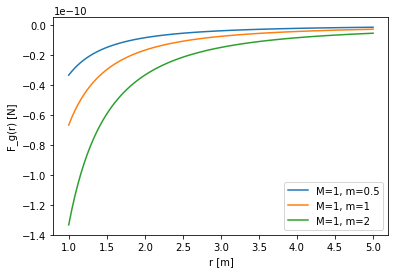

In [13]:
# TASK 4 ANSWER

# Write our function 
def Fg(r, M, m):
    result=-(6.674e-11*M*m)/r**2
    return result

# Create array containing the integers 1-10
r_vals=np.linspace(1,5,100)

plt.plot(r_vals,Fg(r_vals, 1, 0.5),label="M=1, m=0.5")
plt.plot(r_vals,Fg(r_vals, 1, m=1),label="M=1, m=1")
plt.plot(r_vals,Fg(r_vals, 1, 2),label="M=1, m=2")
plt.xlabel("r [m]")
plt.ylabel("F_g(r) [N]")
plt.legend()
plt.show()

## 2.3 - The return statement

Up to now, every function we have written in this workshop has included a return statement, even though they are optional - functions will perform their task perfectly well without these statements bolted onto the end. To understand why we often choose to include them in a function, we need to understand a little bit about how python treats variables in functions. 

As an example, consider the simple function ```plus2(x)``` below, which takes a value for ```x``` as an argument, adds two to it, and prints the result to screen:

In [14]:
# A FUNCTION WITH NO RETURN STATEMENT - WHATS THE WORST THAT CAN HAPPEN?

# Write a function that takes an argument x, and adds two to its value. Note that
# this function has a print statement in place of a return statement
def plus2(x):
    manipulated_x=x+2
    print(x, "+ 2 =", manipulated_x)       # print the manipulated value of x

We can check that this function is working as intended in the usual way...

In [15]:
# THE FUNCTION WORKS, HUZZAH!

# Call our 'plus2' function by passing it a number as argument. If the function is 
# working the value of x+2 should be printed to screen
plus2(5)

5 + 2 = 7


Suppose we wanted to use this new ```x+2``` value later on in our code. We might assume that since the function ```plus2(x)``` stores its result as the variable ```manipulated_x``` before printing, then we could just use this variable directly...

In [16]:
# WE HAVE A PROBLEM...

# Attempt to print the variable 'manipulated_x' 
print(manipulated_x)

NameError: name 'manipulated_x' is not defined

Equally, when we attempt to print the output of a function lacking a return statement we get an odd looking result:

In [17]:
# WHAT IS THE OUTPUT OF A FUNCTION WITH NO RETURN STATEMENT?

# Write a function that cubes a number passed to it as an argument, but forget to include a return statement
def cube(x):
    x_cubed = x**3
    
# Print the output of the function - much like we have done for nearly every function up to now
print(cube(3)) 

None


The same thing happens when we try to assign the output of this function to a new variable:

In [18]:
# Assign the output of the function to a variable, and print the variable
value=cube(5)
print(value)

None


What has happened here? The first code cell showed us that the function ```plus2()``` is working as intended (the value of ```manipulated_x``` printed to screen is two higher than the input value as intended), but when we check on the value of ```manipulated_x``` after the function has done its thing, we are told that ```name 'manipulated_x' is not defined``` - *i.e.*, there is no such variable! 

This behaviour arises because any variable created *inside a function* - as ```manipulated_x``` is in this example - does not exist anywhere outside of the function, they are *local variables* (we say that the variables exist within the *local scope* of the function). This also means that the value of any such variable cannot be accessed outside of the function. 

The second function prints ```None``` to screen rather than the expected results (27 and 125, respectively). Rather confusingly, ```None``` is the 'value' Python assigns to objects when they have no value - this is not the same as having a value of 0 or an empty string). Without a ```return``` statement, a function doesn't output anything when it has finished, so any subsequent attempt use this empty output, *i.e.* in a print statement or variable assignment, will necessarily result in ```None``` and much head scratching.

Both of these problems can be avoided by adding a return statement to our function, which allow us to output the value of a variable when the function has finished.

**Note:** this only returns the value associated with the variable, not the variable itself - the variable remains local even if it is named in the return statement. This is why we need to assign a new variable name to the output of a function in order to use the associated value later on in the code.

<div class="alert alert-block alert-info">
    
### Task 5:
The code in the cell below attempts to calculate the balance of a savings account at the end of each year up to a maximum of four years. The account initially has a balance of £100, and the annual interest rate is 0.72% (this was the best interest rate I could find for a savings account in August 2020!). As written, the code does not work. Identify the problem(s) and provide a working alternative.

In [19]:
# TASK 5 CODE (incorrect code)

# The following code does not work as intended - identify the problem, and correct it in the cell below
balance = 100
def add_interest(balance, rate):
    balance += balance * rate/100
    
for year in range(1, 5):
    add_interest(balance, 0.72)
    print ('Balance after year', year, '=', balance)

Balance after year 1 = 100
Balance after year 2 = 100
Balance after year 3 = 100
Balance after year 4 = 100


In [20]:
# TASK 5 ANSWER:
# Copy and modify the code from the cell above to make it work correctly

balance = 100
def add_interest(balance, rate):
    balance += balance * rate/100
    return balance
    
for year in range(1, 5):
    balance=add_interest(balance, 0.72)
    print ('Balance after year', year, '=', balance)

Balance after year 1 = 100.72
Balance after year 2 = 101.445184
Balance after year 3 = 102.1755893248
Balance after year 4 = 102.91125356793856


### 2.3.1 - Returning multiple values
Up to now, all of our examples have returned a single result. To return two or more values from a function we pack them into something called a tuple...

<img src="./STUFF/touple.jpg" width="400">

[sorry not sorry](https://www.youtube.com/watch?v=ZBVrPWwSlRM)

Tuples are identical to lists in all respects except for two crucial properties:
- Tuples are defined by a comma-separated sequence of values without any enclosing square brackets ```[]```.
- Tuples are *immutable* - their elements cannot be changed after they are created.

As an example, the function ```multi_output``` below populates an array with random numbers, and then calculates the mean and standard deviation of the array elements. Once finished, the array, its mean, and standard deviation values are packed into a tuple (recall that a tuple consists of a number of objects separated by commas) which is then returned by the function:

In [21]:
#RETURNING MULTIPLE VALUES? PACK THEM ALL INTO A TUPLE!

def multi_output(samples):
    
    # Prepare array with a number of elements defined by the 'samples' parameter, each of which is 0 intitially
    random_number_array=np.zeros(samples)
    
    # for loop replaces each element of array in turn with random integer between 0-10 inclusive
    for i in range(samples):
        random_number_array[i]=(random.randint(0,10))
    
    # Use built=in NumPy functions to calculate mean and standard deviation of array elements
    array_mean=np.mean(random_number_array)
    array_std_dev=np.std(random_number_array)
    
    # Return statement packs 'random_number_array', 'array_mean', and 'array_std_dev' into a tuple
    return random_number_array, array_mean, array_std_dev

When the function is run, it outputs a tuple containing three elements - the array of random numbers, a mean value, and a standard deviation:

In [22]:
# Function outputs a tuple containing an array with 5 elements, and two numbers specifying the mean and std. dev.
multi_output(5)

(array([ 4., 10.,  0.,  6.,  4.]), 4.8, 3.249615361854384)

We would usually want to assign each of these returned objects to a variable for use later on in the program. Tuple unpacking allows us to assign variable names to all of the objects in a tuple using a single line of code:

In [23]:
# UNPACKING THE TUPLE GIVES ACCESS TO THE INDIVIDUAL OBJECTS

# Call function again (will generate different values for everything), and unpack 
# the returned tuple by assigning each object to a separate variable ('array', 'mean', and 'std_dev').
array, mean, std_dev=multi_output(10)

# Print the objects individually
print("Random array =", array)
print("Mean of values =", mean)
print("Standard deviation =", std_dev)

Random array = [ 7.  2. 10.  6.  8.  6.  4.  1.  7.  0.]
Mean of values = 5.1
Standard deviation = 3.0805843601498726


When unpacking a tuple, the number of variables on the left must match the number of objects contained within the oringinal tuple. If this condition is not met, Python will complain:

In [24]:
#TUPLE UNPACKING ERRORS 1 - UNPACKING INTO TOO FEW VARIABLES

#Unpacking output_tuple from "multi_output" (three objects) into two variables
array, mean=multi_output(10)

ValueError: too many values to unpack (expected 2)

In [25]:
#TUPLE UNPACKING ERRORS 2 - UNPACKING INTO TOO MANY VARIABLES

#Unpacking output_tuple from "multi_output" (three objects) into four variables
array, mean, std_dev, median=multi_output(10)

ValueError: not enough values to unpack (expected 4, got 3)

<div class="alert alert-block alert-info">
    
### Task 6:
The solutions (or *roots*) to the equation:
    $$ax^2+bx+c=0$$ 
are given by the quadratic formula:
$$x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

Write a function that passes the values of $a$, $b$, and $c$ as arguments, and returns the two roots of the equation. Test your function using the input values $a=1$, $b=4$, and $c=-5$ which should return roots at $x=-5$ and $x=1$.

**Useful commands:**
- ```np.sqrt(x)``` returns the square root of ```x```. Note that you will get an error message if ```x``` is negative (in our case, this error will signify that the quadratic equation in question has no real roots)

In [26]:
# TASK 6 ANSWER:

def quadratic_solver(a, b, c):
    d=np.sqrt(b**2-4*a*c)
    root1=-(b+d)/(2*a)
    root2=-(b-d)/(2*a)
    
    return root1, root2

root1, root2 = quadratic_solver(1, 4, -5)
print('First root is x =', root1)
print('Second root is x =', root2)

First root is x = -5.0
Second root is x = 1.0


# 3 - Modular code is the best code!
We have seen that Python functions are an extremely useful way of avoiding needless repetition in code - if you use a block of code repeatedly, make it into a function!

Another useful facet of functions is that they allow us to break complex processes up into separate functions, each of which performs a specific task. Breaking a large task into smaller sub-tasks like this is known as *modularisation*, and often makes the problem easier to think about. As your programs become more complicated, it also helps maintain the readability of your code (essential when you revisit it after a long period!), and makes them easier to maintain and troubleshoot. 

In this final section, we apply this modular paradigm in a series of tasks which will result in us writing a short program allowing us to numerically differentiate simple mathematical functions. 

<div class="alert alert-block alert-info">
    
### Task 7:

In this question we are going to write a simple program which is able to differentiate mathematical functions numerically. To do this, we are going to make direct use of the <i>first principles definition</i> of a derivative:
    $$ $$
    $$f'(x)=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}$$
    $$ $$    
where $f(x)$ and $f'(x)$ are our original function and its derivative, respectively, and $h$ is the stepsize (which we called $\Delta x$ in the CH162:Mathematics for chemists notes). From this equation you can see that in order to calculate a derivative numerically, all we need is the defintion of the function $f(x)$ itself, and a value for the step size - numerical differentiation just requires that we are able to write functions!

As a very simple example lets calculate the derivative of $f(x)=x^{4}$ at $x=1.3$. The analytical solution, $f'(x)=4x^{3}$, tells us that the answer should be 8.788. How well will our numerical approxiation perform? We are going to break this task into two modular pieces: 

### Step (i)

The first step is to define the mathematical function $(f(x)=x^{4})$ using python. In the code cell below, complete the definition of the function ```x_pwr4()``` which reads in a value for $x$, and returns the value $x^4$.  

In [27]:
# TASK 7 - STEP (i) ANSWER:

# Complete the function definition below - remember to include a return statement!
def x_pwr4(x): 
    y=x**4
    return y      

########################################################################################
#                                                                                      #
#                                 CODE CHECKING                                        #
#                                                                                      #
# The code below will check that the function `x_pwr4` is working correctly - do not   #
# change it or ignore the message printed                                              #
########################################################################################

if x_pwr4(2)==16 and x_pwr4(8)==4096:
    print("Your code works correctly, move on to step (ii)")
else:
    print("Your code contains an error, you need to fix it before moving onto step (ii)")

Your code works correctly, move on to step (ii)


<div class="alert alert-block alert-info">
    
### Task 7 - step (ii):

Now that the function ```x_pwr4()``` is working correctly, we can use it in the calculation of the deriviative of $x^{4}$. To do this, we are going to write a second function, ```differentiate()```, containing two parameters - the stepsize, $h$, and the value of $x$ we are using to evaluate the derivative.

Using the first principles definition of a derivative given above, complete the function definition in the code cell below to return the derivative of $x^{4}$.

**Useful tips:**
- Functions can be called from within other functions, and their output used as normal
- Both ```x``` and ```h``` are numbers, therefore ```x+h``` is also a number, and can be passed to a function as an argument

In [28]:
# TASK 7 - STEP (ii) ANSWER:

# Complete the function definition below

def differentiate(x, h):
    value=(x_pwr4(x+h)-x_pwr4(x))/h
    return value

########################################################################################
#                                                                                      #
#                                 CODE CHECKING                                        #
#                                                                                      #
# The code below will check that the function `differentiate()` is working correctly   #
#                                                                                      #
########################################################################################

if np.around(differentiate(1.3, 1e-2),decimals=4)==8.8899:
    print("Congratulations, you have succesfully written a numerical differentiation code! Move onto Task 8.")
else:
    print("Your code contains an error, you need to fix it before moving onto Task 8")

Congratulations, you have succesfully written a numerical differentiation code! Move onto Task 8.


<div class="alert alert-block alert-info">
    
### Task 8:
If you succesfully completed Task 7, your ```differentiate()``` function should return a value of approximately 8.89 for the derivative of $x^4$ evaluated at $x=1.3$. While this is close to the true value of 8.788, can we do better?

The first-principles definition of a derivative is taken in the limit of $h$ approaching zero. This suggests to us that if we decrease the value of $h$ (and thus approach the limit of $h=0$), our numerical answer should become more accurate. Using the function ```differentiate()``` from task 7, repeat the above calculation using step sizes of $h=1,\,0.1,\,0.01,\,0.001,\,0.0001$, and $0.00001$. You could manually run the function six times (once for each different value of $h$), but can you think of a more efficient way to calculate these answers? 

In [29]:
# TASK 8 ANSWER:

# Create an array containing required step sizes
h_list=np.array([1, 1.e-1, 1.e-2, 1.e-3, 1.e-4, 1.e-5])

# Either use a for loop
for h in h_list:
    num_approx=differentiate(1.3, h)
    print("h = {}; numerical approximation = {:1.3f}".format(h,num_approx))

# Or use the h_list array directly as one of the arguments (this will not work if the step sizes 
# are stored in a list)
differentiate(1.3, h_list)

h = 1.0; numerical approximation = 25.128
h = 0.1; numerical approximation = 9.855
h = 0.01; numerical approximation = 8.890
h = 0.001; numerical approximation = 8.798
h = 0.0001; numerical approximation = 8.789
h = 1e-05; numerical approximation = 8.788


array([25.128     ,  9.855     ,  8.889921  ,  8.7981452 ,  8.78901405,
        8.7881014 ])

<div class="alert alert-block alert-info">
    
### Task 9:
Repeat Task 7, but make a program capable of finding the derivative with respect to $x$ of any mathematical function having the general formula:

$$f(x)=ax^{p}$$

where the values of $a$ and $p$ are passed to the function as arguments.

Check your code by evaluating the derivative of $f(x)=4x^3$ when $x=3$. If your code is working correctly it should return a value of approximately 108 (the exact value returned will depend upon the stepsize chosen).

In [30]:
# TASK 9 ANSWER:

# Create function to return value of a*x^p for any combination of a, x, and p
def f(x, a, p):
    y=a*x**p
    return y

# Differentiate function needs to be modified to account for the extra parameters in 'f()'
def differentiate(x, a, p, h):
    value=(f(x+h,a,p)-f(x,a,p))/h
    print(value)
    
differentiate(x=3, a=4, p=3, h=1.e-6)

108.00003602184916
